![Banner](img/banner.png)

# Actividad N°3: Holgura complementaria en problemas de optimización con restricciónes

***Matemáticas para Machine Learning***.

**Semana 7 - Lección 3 -** Restricciones de igualdad

**Profesor:** *Fernando Enrique Lozano Martinez* - **Autor Notebook:** *Nicolas Orlando López Cuéllar*


# Introducción

## Descripción

El presente *jupyter notebook* contiene todo el material para el desarrollo de la Tarea 3 de la Semana 7 del curso ***Matemáticas para Machine Learning***. En este laboratorio se trabajaran con problemas de optimización convexos con restricciones lineales, y se observarán los conceptos de holgura complementaria en la solución del problema.

**Objetivos de Aprendizaje:**

*   Identificar el efecto de restricciones lineales en un problema de optimización cuadrático.

## Metodología

Para desarrollar el taller usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el códgio dentro de estas lineas de comentarios. Dentro de estos comentarios encontrará indicaciónes de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura para llenar o no, revise y complete la asignación).

# Teoría

Recuerde que los problemas de optimización convexos con restricciónes de desigualdad lineales se pueden transformar en problemas de optimización convexos con restricciónes de igualdad.

# Problemas

In [14]:
# Librerias principales
import sys
import numpy as np
import pandas as pd

# Visualización
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [15]:
# UTILIDADES =================================
from maiautils import MaiaUtils
mutils = MaiaUtils(get_ipython()) 
# ============================================

In [16]:
# Cambiar configuración de informe de errores
mutils.toggle_traceback()

## Función de trabajo

Utilizamos las siguiente función de trabajo:

$$ 
f = \mathbf{x}^T A \mathbf{x} + B \mathbf{x} 
$$

Queremos resolver el problema:

$$ \begin{array}{rl}
\displaystyle \min_{\mathbf{x}} & f(\mathbf{x}) \\
\text{s.a} & M \mathbf{x} \leq \mathbf{c}
\end{array} 
\qquad \text{con} \qquad 
M = \begin{bmatrix} 
m_{11} & m_{12} \\ m_{21} & m_{22}
\end{bmatrix} 
\quad
\mathbf{c} = \begin{bmatrix} 
 c_1 \\ c_2
\end{bmatrix}$$

Replanteado como


$$ \begin{array}{rl}
\displaystyle \min_{\mathbf{x}} & f(\mathbf{x}) \\
\text{s.a} & \overline{M} \overline{\mathbf{x}} = \mathbf{c}
\end{array} 
\qquad \text{con} \qquad 
\overline{M} = \begin{bmatrix} 
m_{11} & m_{12} & 1 & 0 \\ m_{21} & m_{22} & 0 & 1
\end{bmatrix} 
\quad
\overline{\mathbf{x}} = \begin{bmatrix} 
 x \\ y \\ s_2 \\ s_2 
\end{bmatrix}$$




Ahora considere el siguiente conjunto de restricciones:


$$ M = \begin{bmatrix} 
1 & 1 \\ -1 & 6
\end{bmatrix} 
\quad
\mathbf{c} = \begin{bmatrix} 
 1 \\ 2
\end{bmatrix} $$

Este lo podemos gráficar el plano cartesiano de la siguiente manera:

## Metricas

Para poder visualizar lo que pasa con las viarables de holgura modifcamos el algoritmo de descenso de gradiente pryectado, de tal manera que se guarden los valores asociados a las variables de holgura.

In [17]:
M = [[1,1],[-1,6]]
C = [1,2]

In [18]:
def plot_region_factible(x,y,A,B,M=M,C=C):
    
    X,Y = np.meshgrid(np.linspace(x[0],x[1],100),np.linspace(y[0],y[1],100))
    Z = mutils.fun_cuadratica(X,Y,A,B)
    
    # Contour
    fig, ax = plt.subplots()
    cnt = ax.contour(X, Y, Z, colors = "k", linewidths = 0.5)
    ax.clabel(cnt, cnt.levels, inline = True, fontsize = 10)
    
    X = np.linspace(x[0],x[1],100)
    
    if M[0][1]!=0:
        Y1 = (C[0]-M[0][0]*X)/M[0][1]
        plt.plot(X,Y1,color='g',linewidth=4)
        plt.fill_between(X, [-100]*100, Y1, color='green',
                alpha=0.5,label='Restricción 1')
    
    if M[1][1]!=0:
        Y2 = (C[1]-M[1][0]*X)/M[1][1]
        plt.plot(X,Y2,color='b',linewidth=4)
        plt.fill_between(X, [-100]*100, Y2, color='b',
                alpha=0.2,label='Restricción 2')
    
    ax.set_aspect('equal', adjustable='box')
    plt.legend(loc='lower center', shadow=True)
    plt.title('Curvas de Nivel & Restricciones Lineales')
    plt.xlabel("$x$",fontsize=15)
    plt.ylabel("$y$",fontsize=15)
    plt.xlim(x[0],x[1])
    plt.ylim(y[0],y[1])
    plt.show()

In [19]:
A = [[2,1],[0,1]]
B = [0,0]

x = [-4,4]
y = [-4,4]

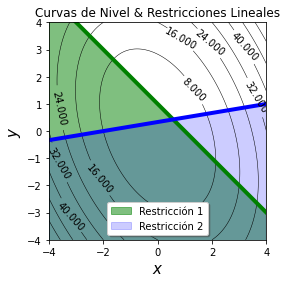

In [20]:
plot_region_factible(x,y,A,B)

## Mínimo interior

Escriba los parámetros $A$ y $B$ de una función de tal manera que la solución al problema sea un puntos interior al poliedro formado por las restricciones.


In [21]:
A = [[1,0],[0,1]]
B = [0,0]

### Probar

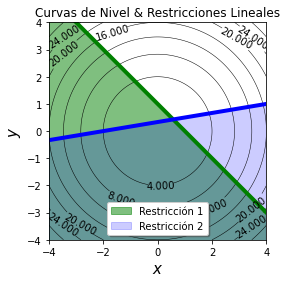

In [22]:
plot_region_factible(x,y,A,B)

## Una restricción Activa

Escriba los parámetros $A$ y $B$ de una función de tal manera que la solución al problema se encuentre sobre la recta definida por la restricción


In [23]:
A = [[0,0],[0,0]]
B = [0,0]

### Probar

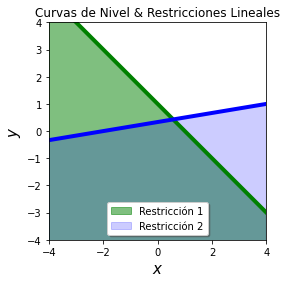

In [24]:
plot_region_factible(x,y,A,B)

## Dos Restricciones Activas

Escriba los parámetros $A$ y $B$ de una función de tal manera que la solución al problema se encuentre sobre la intersección de las rectas definidas por las restricciónes

In [25]:
A = [[0,0],[0,0]]
B = [0,0]

### Probar

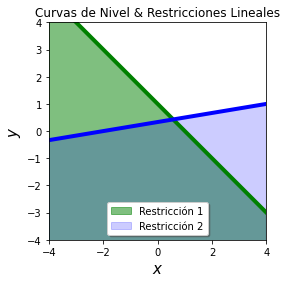

In [26]:
plot_region_factible(x,y,A,B)